In [1]:
%load_ext autoreload
%autoreload 2

In [136]:
from wdtools import *

In [3]:
# this can take about 9 - 11 minutes
start = time.time()
all_taxlot = combine_taxlot()
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 9.0 minutes to complete


In [4]:
start = time.time()
all_mapIdx = read_all_mapIdx()
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 1.0 minutes to complete


In [5]:
sa_gdf_all = get_all_SA(num=4)
wd_df = get_all_wd(num=4)

In [45]:
wd_df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot', 'SetID'],
      dtype='object')

In [54]:
wd_df.county.unique()

array(['Clatsop', 'Coos', 'Deschutes', 'Harney', 'Jackson', 'Josephine',
       'Lake', 'Marion', 'Baker', 'Benton', 'Clackamas', 'Morrow',
       'Columbia', 'Grant', 'Klamath', 'Lincoln', 'Tillamook',
       'TIllamook', 'Crook', 'Curry', 'Hood River', 'Jefferson', 'Linn',
       'Multnomah', 'Wasco', 'Yamhill', 'Yamhill and Washington'],
      dtype=object)

In [149]:
wd_df[wd_df.county.isin(['Washington', 'Sherman', 'Wallowa', 'Douglas', 'Malheur'])]

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot,SetID


In [150]:
wd_df[wd_df.wetdet_delin_number == 'WD2019-0259']

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot,SetID
585,WD2019-0259,18S47E09,100,650 College Blvd,Ontario,Harney,Treasure Valley Connector Trail,WD2019-0259 grant,44.014009,-116.975519,...,2019-05-09,NaN,78130.0,128583,586,,2019,2019,N,1


In [97]:
#wdIDs = wd_df[wd_df.county!='Yamhill and Washington'].wetdet_delin_number.unique()
wdIDs = wd_df[wd_df.county == 'Morrow'].wetdet_delin_number.unique()

In [98]:
# example data
em_wids = wdIDs
#em_wids = ['WD2020-0130', 'WD2020-0271', 'WD2022-0083', 'WD2022-0026']

In [99]:
wdIDs_unmapped = [wid for wid in em_wids if wid not in sa_gdf_all.wdID.values]

In [100]:
wdIDs_unmapped

['WD2017-0198', 'WD2017-0229', 'WD2019-0082']

In [9]:
wd_df[wd_df.wetdet_delin_number.isin(wdIDs_unmapped)]

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot,SetID
1422,WD2017-0229,07S40E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,110476,1423,"Partial, Many",2017,2017,Y,2
1423,WD2017-0229,10S40E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140879,1424,"Partial, Many",2017,2017,Y,2
1424,WD2017-0229,09S41E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140878,1425,"Partial, Many",2017,2017,Y,2
1425,WD2017-0229,09S40E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140877,1426,"Partial, Many",2017,2017,Y,2
1426,WD2017-0229,08S40E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140876,1427,"Partial, Many",2017,2017,Y,2
1427,WD2017-0229,10S41E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140880,1428,"Partial, Many",2017,2017,Y,2
1428,WD2017-0229,11S43E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140883,1429,"Partial, Many",2017,2017,Y,2
1429,WD2017-0229,15S45E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140889,1430,"Partial, Many",2017,2017,Y,2
1430,WD2017-0229,10S42E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140881,1431,"Partial, Many",2017,2017,Y,2
1431,WD2017-0229,14S45E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,NaN,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,-119.623309,...,2018-09-13,NaN,54125.0,140888,1432,"Partial, Many",2017,2017,Y,2


In [108]:
out = split_SA_by_rid_in_df(wd_df=wd_df, 
                            sa_gdf_all=sa_gdf_all, 
                            all_mapIdx=all_mapIdx, 
                            all_taxlot=all_taxlot, 
                            em_wids=em_wids,
                            export=True, 
                            outnm='Morrow')

In [47]:
out['geometry'] = out.geometry.buffer(0)

In [45]:
out.head(3)

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,reissuance_response_date,project_id,site_id,SetID,record_ID,ORMapNum,geometry,code,lat,lon
0,WD2018-0158,02N24E00,"100,105,106,All part","73396 Tower Rd, Boardman",Boardman,Morrow,Carty Generating Station 02N24E00,"Combined cycle natural gas power,solar generat...",45.677501,-119.797083,...,None,NaN,108579,2,2081,2502.00N24.00E0000--0000,GEOMETRYCOLLECTION Z (LINESTRING Z (1483460.57...,1.0,45.674948,-119.789698
1,WD2018-0158,03N24E00,"102,104,114,117,121,122,All part","73396 Tower Rd, Boardman",Boardman,Morrow,Carty Generating Station 03N24E00,"Combined cycle natural gas power,solar generat...",45.678121,-119.817869,...,None,NaN,108580,2,2082,2503.00N24.00E0000--0000,"POLYGON Z ((1488544.958 1439526.377 0.000, 148...",1.0,45.696707,-119.815395
2,WD2018-0407,05N27E19CC,many,None,Irrigon,Morrow,Irrigon CDBG Sewer Proj,site evaluation for city sewer conversion comp...,45.895525,-119.496236,...,None,60309.0,109709,2,2085,2505.00N27.00E19CC--0000,MULTIPOLYGON Z (((1569741.794 1512919.716 0.00...,2.0,45.895031,-119.491617


In [147]:
'10S42E19' in trsqq

False

In [146]:
create_ORTaxlot(cnt_code=cnt_dict['Baker'], trsqq='10S42E19', lot='2400')

'0110.00S42.00E1900--000002400'

In [51]:
len(wd_df_s.wetdet_delin_number.unique())

31

In [37]:
WD2017_0229 = gpd.read_file(wdpath+'\\Jurisdiction\\StudyArea2017-0229\\WD2017-0229StudyArea.gdb', layer='Polygons')

In [41]:
WD2017_0229['wdID'] = 'WD2017-0229'
WD2017_0229 = WD2017_0229.dissolve('wdID')
WD2017_0229['wdID'] = WD2017_0229.index
WD2017_0229.reset_index(drop=True, inplace=True)
WD2017_0229['code'] = 3
gdf = WD2017_0229[['wdID', 'code', 'Shape_Length', 'Shape_Area', 'geometry']]
gdf = gdf.to_crs(epsg=2992)

In [40]:
gdf

,wdID,code,Shape_Length,Shape_Area,geometry
0,WD2017-0229,3,0.006822,0.000003,"MULTIPOLYGON (((2230450.013 678981.088, 223059..."


In [79]:
wd_df.loc[wd_df.record_ID==1424, 'trsqq'] = '10S40E01'
wd_df.loc[wd_df.record_ID==1430, 'trsqq'] = '10S40E02'
wd_df.loc[wd_df.record_ID==2076, 'trsqq'] = '04N25E13'

In [80]:
WD2017_0229_gdf = split_WD_to_records(df=wd_df, gdf=gdf, wdID='WD2017-0229', mapindex=all_mapIdx, taxlots=all_taxlot, review=True)

In [81]:
ORMapNum_toCheck = WD2017_0229_gdf.loc[WD2017_0229_gdf.geometry.isnull(), 'ORMapNum'].values

In [82]:
ORMapNum_toCheck

array([], dtype=object)

In [52]:
[ORMapNum for ORMapNum in ORMapNum_toCheck if ORMapNum not in all_mapIdx.ORMapNum.values]

['0115.00S45.00E0000--0000']

In [55]:
WD2017_0229_gdf.trsqq.values

array(['07S40E00', '10S40E00', '09S41E00', '09S40E00', '08S40E00',
       '10S41E00', '11S43E00', '15S45E00', '10S42E00', '14S45E00',
       '14S44E00', '13S44E00', '12S43E00', '12S42E00', '11S42E00',
       '01N26E00', '01N27E00', '01N28E00', '02N25E00', '02N26E00',
       '04N25E00', '04N26E00'], dtype=object)

In [137]:
create_ORMapNm(ct_nm='Malheur', trsqq='15S45E34')

'2315.00S45.00E0000--0000'

In [139]:
wd_df.loc[wd_df.wetdet_delin_number=='WD2020-0083', 'DecisionLink'].values[0]

'https://docs.dsl.state.or.us/PublicReview/ElectronicFile.aspx?docid=3647172&dbid=0'

In [49]:
WD2017_0229_gdf[WD2017_0229_gdf.ORMapNum=='0115.00S45.00E0000--0000']

,geometry,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,...,status_name,received_date,response_date,reissuance_response_date,project_id,site_id,SetID,ORMapNum,code,record_ID
7,None,WD2017-0229,15S45E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,None,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,...,Approved,2017-05-15,2018-09-13,None,54125.0,140889,2,0115.00S45.00E0000--0000,NaN,1430


In [56]:
WD2017_0229_gdf[WD2017_0229_gdf.ORMapNum.isin(ORMapNum_toCheck)]

,geometry,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,...,status_name,received_date,response_date,reissuance_response_date,project_id,site_id,SetID,ORMapNum,code,record_ID
1,None,WD2017-0229,10S40E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,None,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,...,Approved,2017-05-15,2018-09-13,None,54125.0,140879,2,0110.00S40.00E0000--0000,NaN,1424
7,None,WD2017-0229,15S45E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,None,Baker,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,...,Approved,2017-05-15,2018-09-13,None,54125.0,140889,2,0115.00S45.00E0000--0000,NaN,1430
20,None,WD2017-0229,04N25E00,Many tax maps and tax lots,Project crosses five counties from Boardman to...,None,Morrow,Boardman to Hemingway Trans Line,New 500-kilovolt transmission line and associa...,45.831088,...,Approved,2017-05-15,2018-09-13,None,54125.0,140857,2,2504.00N25.00E0000--0000,NaN,2076


In [85]:
WD2017_0198 = gpd.read_file(inpath+'\\GIS\ArcGIS Pro Project\DataReview\issueIDs.gdb', layer='WD2017_0198')
WD2019_0082 = gpd.read_file(inpath+'\\GIS\ArcGIS Pro Project\DataReview\issueIDs.gdb', layer='WD2019_0082')

In [87]:
WD2017_0198['wdID'] = 'WD2017-0198'
WD2019_0082['wdID'] = 'WD2019-0082'
WD2017_0198['code'] = 2
WD2019_0082['code'] = 2

In [88]:
WD2017_0198 = WD2017_0198.to_crs(epsg=2992)
WD2019_0082 = WD2019_0082.to_crs(epsg=2992)

In [91]:
WD2017_0198_gdf = split_WD_to_records(df=wd_df, gdf=WD2017_0198, wdID='WD2017-0198', mapindex=all_mapIdx, taxlots=all_taxlot)

In [92]:
WD2019_0082_gdf = split_WD_to_records(df=wd_df, gdf=WD2019_0082, wdID='WD2019-0082', mapindex=all_mapIdx, taxlots=all_taxlot)

In [111]:
last3gdf = pd.concat([WD2017_0198_gdf, WD2017_0229_gdf, WD2019_0082_gdf], ignore_index=True)

In [117]:
testgdf=export_wd_gdf_by_record(gdf=last3gdf, outnm='last3gdf_Morrow')

In [118]:
testgdf1=gpd.read_file(f'{outpath}\\test\\Morrow.shp')
testgdf2=gpd.read_file(f'{outpath}\\test\\example_data.shp')

In [119]:
gdf=pd.concat([testgdf, testgdf1, testgdf2], ignore_index=True)

In [120]:
gdf.shape

(132, 26)

In [121]:
gdf.to_file(f'{outpath}\\test\\example_data_7_11_23.shp')

In [38]:
setID = 'Set002'

In [39]:
matched = gpd.read_file(outpath + f'\\matched\\matched_records_{setID}_edited.shp')
mapped = gpd.read_file(outpath + f'\\final\\mapped_wd_{setID}.shp')

In [23]:
matIDs = [wid for wid in wdIDs if wid in mapped[mapped.code==0].wdID.unique()]

In [24]:
comp_mat = matched[matched.wdID.isin(matIDs)]

In [25]:
comp_mat.head(3)

,wdID,trsqq,parcel_id,notes,lots,lot,ORTaxlot,record_ID,geometry
1231,WD2017-0259,04N26E07,100,None,100,100,2504.00N26.00E0700--000000100,2078,"MULTIPOLYGON (((1539075.537 1492552.041, 15388..."
1235,WD2018-0159,06S25E00,2901,None,2901,2901,2506.00S25.00E0000--000002901,2083,"POLYGON ((1526090.885 1194359.787, 1526480.413..."
1236,WD2018-0430,05N27E21,100,None,100,100,2505.00N27.00E2100--000000100,2091,"POLYGON ((1580310.900 1516257.313, 1578965.345..."


In [26]:
# single parcel id in the matched records
sig_pcl_mat = comp_mat[~comp_mat.lots.str.contains(',')]
# two and plus in the matched records
twp_pcl_mat = comp_mat[comp_mat.lots.str.contains(',')]

In [27]:
# dissolve the polygons by record ID
twp_pcl_mat_dis = twp_pcl_mat.drop(columns=['lot', 'ORTaxlot'])
twp_pcl_mat_dis = twp_pcl_mat_dis.dissolve('record_ID')
twp_pcl_mat_dis.loc[:, 'record_ID'] = twp_pcl_mat_dis.index

In [28]:
twp_pcl_mat_dis.shape

(10, 7)

In [19]:
import matplotlib.pyplot as plt

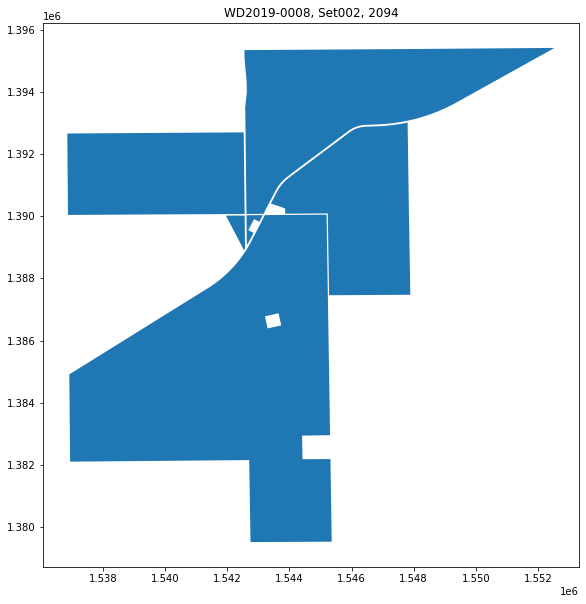

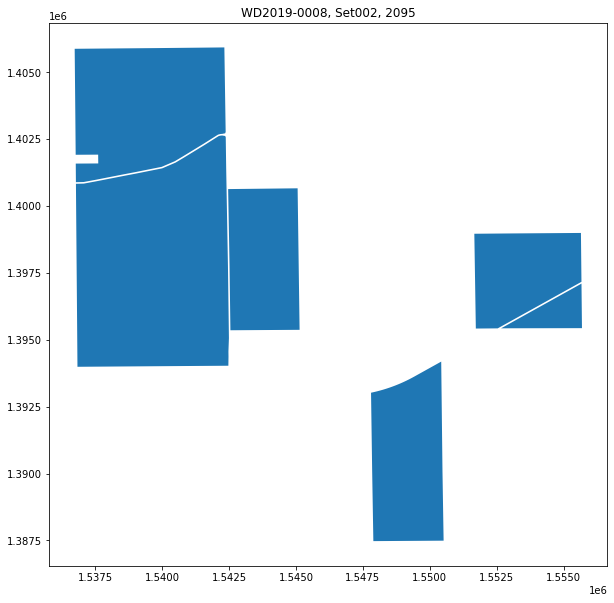

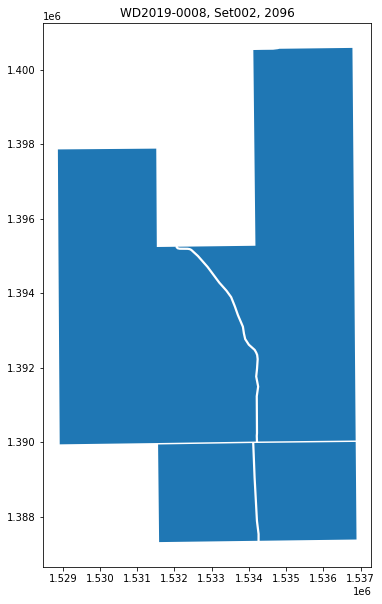

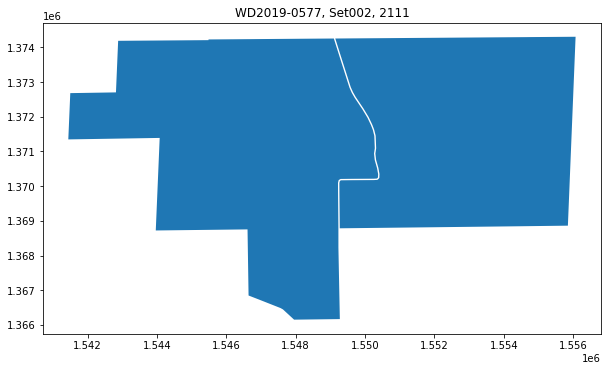

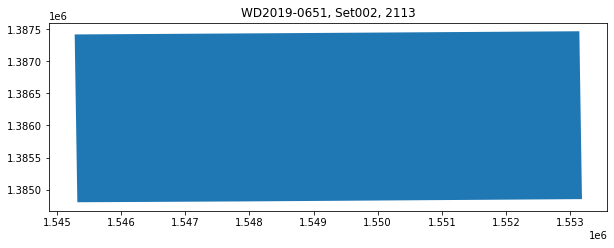

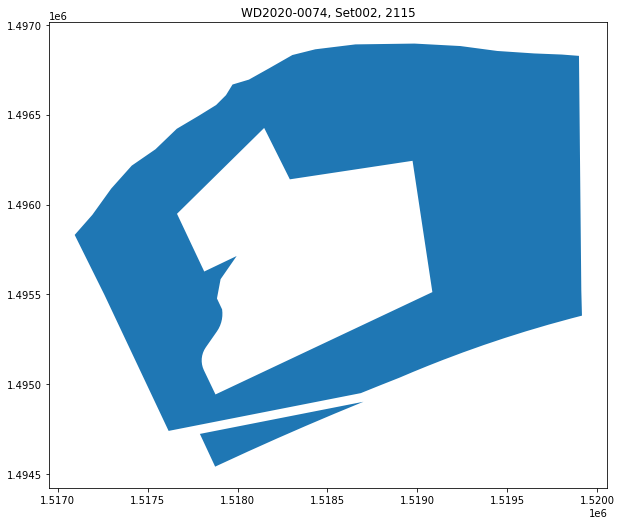

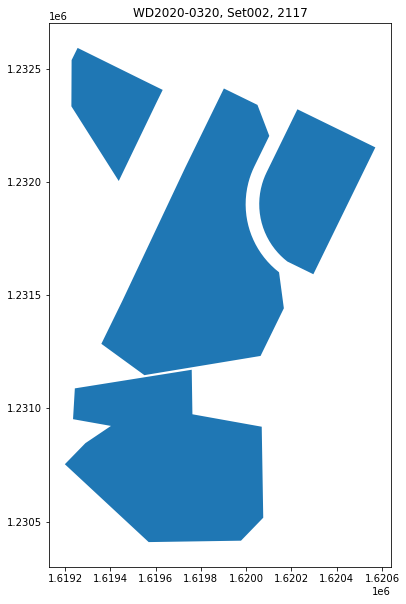

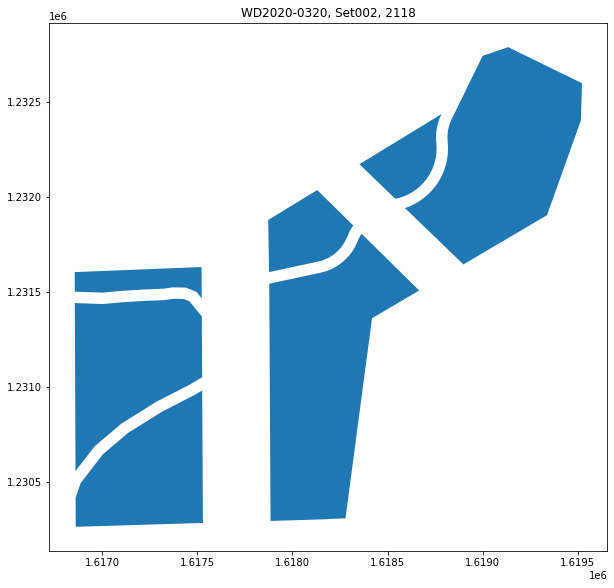

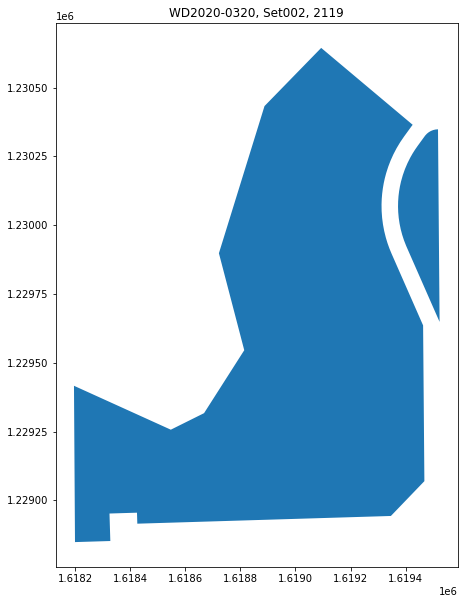

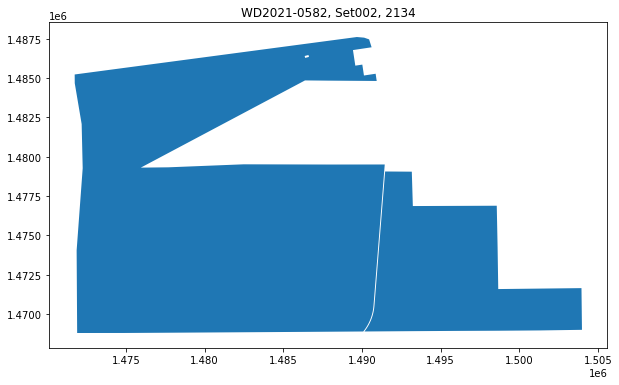

In [29]:
for rid in twp_pcl_mat_dis.record_ID.unique():
    fig, ax = plt.subplots(figsize = (10,10))
    twp_pcl_mat_dis[twp_pcl_mat_dis.record_ID==rid].plot(ax=ax)
    wdID = twp_pcl_mat_dis.loc[twp_pcl_mat_dis.record_ID==rid, 'wdID'].values[0]
    ax.set_title(f"{wdID}, {setID}, {rid}")

In [53]:
digtIDs = [wid for wid in wdIDs if wid in mapped[mapped.code!=0].wdID.unique()]

In [54]:
#digitized = mapped[mapped.code==2]
digitized = mapped[mapped.wdID.isin(digtIDs)]

In [55]:
digitized['area'] = digitized['geometry'].area

In [17]:
cnty = gpd.read_file(r'X:\Data\State\ORCnty2015.shp')

In [18]:
cnty=cnty.to_crs(epsg=2992)

In [56]:
digitized

,code,wdID,geometry,area
0,2,WD2017-0001,"POLYGON Z ((1440038.463 1476800.836 0.000, 145...",3.274306e+07
38,1,WD2017-0275,MULTIPOLYGON Z (((1476548.521 1436922.350 0.00...,6.969175e+08
97,1,WD2018-0158,"POLYGON Z ((1488525.837 1439805.828 0.000, 148...",4.364249e+07
113,2,WD2018-0326,"POLYGON Z ((1520792.232 1374011.496 0.000, 152...",6.987872e+06
121,2,WD2018-0407,MULTIPOLYGON Z (((1568742.176 1512778.389 0.00...,5.775654e+06
258,1,WD2020-0383,"POLYGON Z ((1584358.362 1457894.115 0.000, 158...",8.441907e+07
275,2,WD2020-0550,MULTIPOLYGON Z (((1489057.074 1487515.957 0.00...,4.707945e+07
292,2,WD2021-0003,"POLYGON Z ((1522645.566 1491772.852 0.000, 152...",2.216399e+06
312,2,WD2021-0233,MULTIPOLYGON Z (((1517505.154 1494360.840 0.00...,2.259515e+05
369,1,WD2021-0651,"POLYGON Z ((1584358.362 1457894.115 0.000, 158...",8.441907e+07


In [42]:
all_mapIdx.columns

Index(['year', 'ORMapNum', 'geometry'], dtype='object')

In [43]:
wd_df_s['ORMapNum'] = wd_df_s[['county', 'trsqq']].apply(lambda row: create_ORMapNm(ct_nm=row.county, 
                                                                          trsqq=row.trsqq), 
                                               axis = 1)

In [44]:
wd_df_s.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot', 'SetID', 'ORMapNum'],
      dtype='object')

In [49]:
all_mapIdx.columns

Index(['year', 'ORMapNum', 'geometry'], dtype='object')

In [50]:
type(all_mapIdx.year.values[0])

str

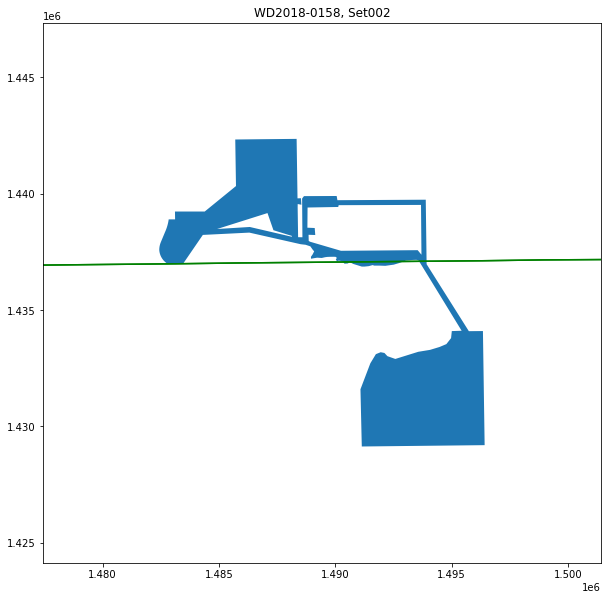

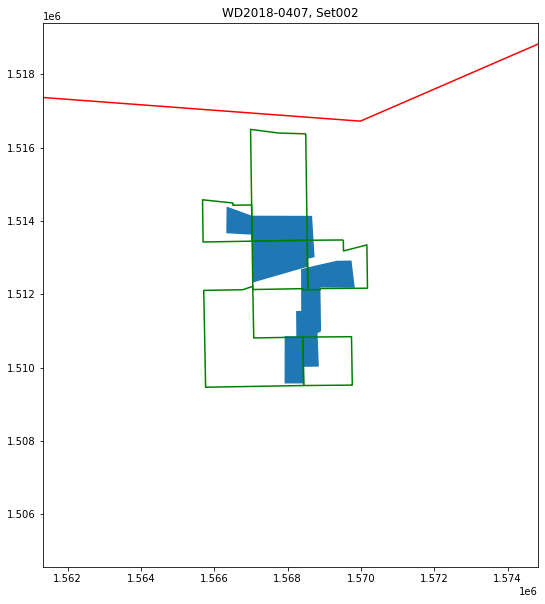

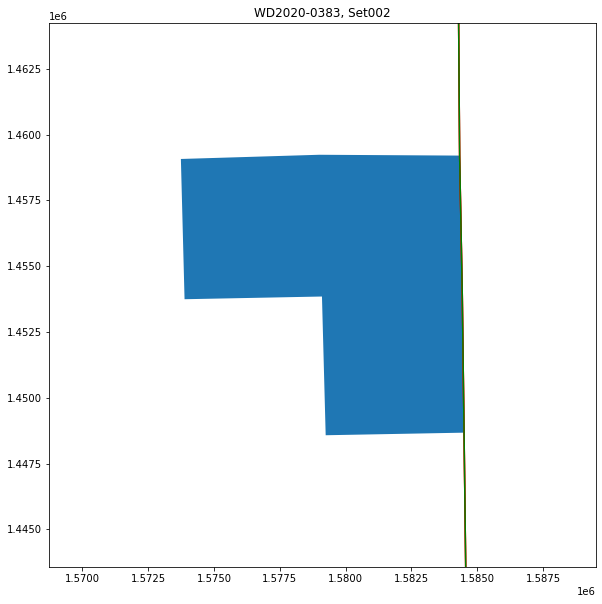

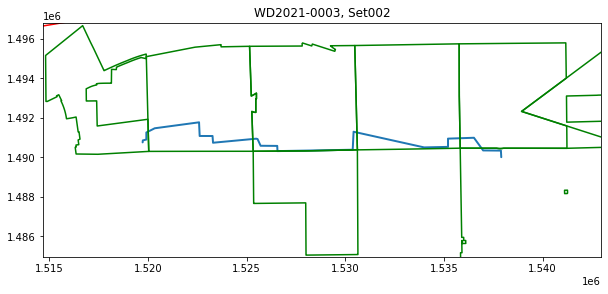

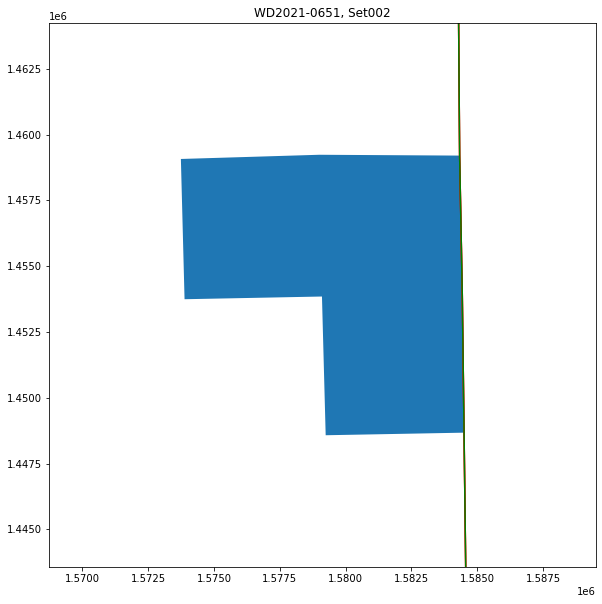

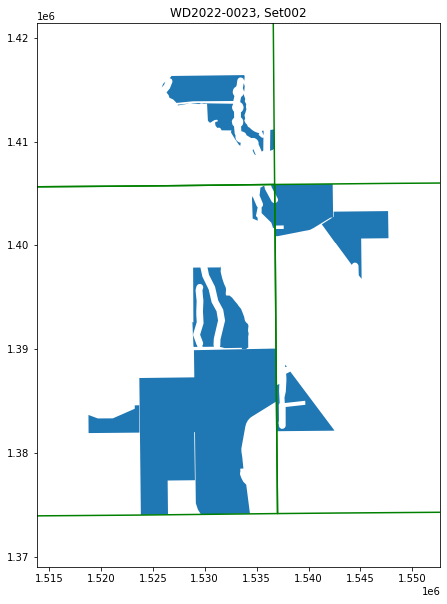

In [57]:
# [digitized.area >= 40000000]
for wid in digitized.wdID:
    #print(wid)
    ORmn = wd_df_s[wd_df_s.wetdet_delin_number==wid].ORMapNum.values
    k = len(ORmn)
    if k>1:
        fig, ax = plt.subplots(figsize = (10,10))
        b = digitized[digitized.wdID==wid]
        xmin, ymin, xmax, ymax = b.total_bounds
        pad = 5000
        ax.set_xlim(xmin-pad, xmax+pad)
        ax.set_ylim(ymin-pad, ymax+pad)
        base = b.plot(ax=ax)
        cnty.boundary.plot(ax=base, color='red')
        yr = wid[2:6]
        #print(f"{wid} {ORmn}")
        mapIdx = all_mapIdx[(all_mapIdx.ORMapNum.isin(ORmn)) & (all_mapIdx.year==yr)]
        mapIdx.boundary.plot(ax=base, color='green')
        ax.set_title(f"{wid}, {setID}")

In [138]:
#wid = 'WD2022-0026'
wid = 'WD2022-0083'

Text(0.5, 1.0, 'WD2022-0083, Set004')

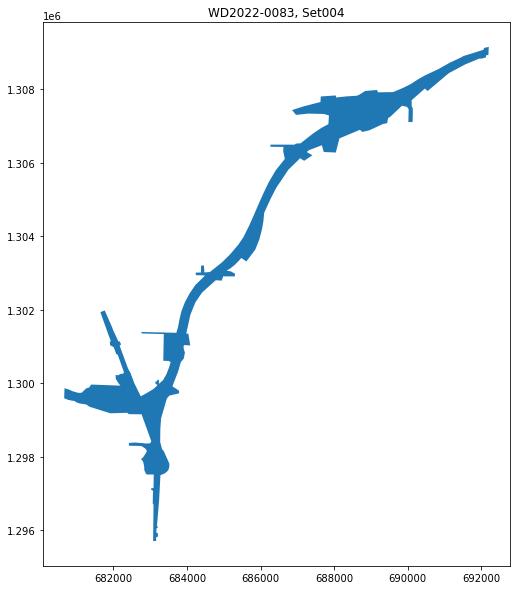

In [115]:
fig, ax = plt.subplots(figsize = (10,10))
p = sa_gdf[sa_gdf.wdID == wid]
p.plot(ax=ax)
ax.set_title(f"{wid}, {'Set00'+str(p.SetID.values[0])}")

In [114]:
wd_df.loc[wd_df.wetdet_delin_number=='WD2020-0271', :]

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,received_date,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot
89,WD2020-0271,08N10W27,"206,211,212,213,214",SE 19th St,Warrenton,Clatsop,North Coast Business Park,WD2020-0271 re-delineation,46.147039,-123.908392,...,2020-05-14,2021-01-04,NaN,79936.0,132894,90,,2020,2020,N
90,WD2020-0271,08N10W27,"206,211,212,213,214",SE 19th St,Warrenton,Clatsop,North Coast Business Park,WD2020-0271 re-delineation,46.147039,-123.908392,...,2020-05-14,2021-01-04,NaN,42028.0,132894,91,,2020,2020,N


In [44]:
wd_df.county.unique()

array(['Clatsop', 'Coos', 'Deschutes', 'Harney', 'Jackson', 'Josephine',
       'Lake', 'Marion', 'Baker', 'Benton', 'Clackamas', 'Morrow',
       'Columbia', 'Grant', 'Klamath', 'Lincoln', 'Tillamook',
       'TIllamook', 'Crook', 'Curry', 'Hood River', 'Jefferson', 'Linn',
       'Multnomah', 'Wasco', 'Yamhill', 'Yamhill and Washington'],
      dtype=object)

In [48]:
wd_df.loc[wd_df.county == 'Yamhill and Washington', 'address_location_desc'].values[0]

'Beginning: OR219 in Newberg; OR99W NE of Newberg'

In [7]:
taxlots22 = gpd.read_file(inpath+'\\GIS\\ORMAP_data\\ORMAP_Taxlot_Years\\Taxlots2022.gdb', 
                          layer='Taxlots')

In [256]:
taxlots22.columns

Index(['County', 'Town', 'TownPart', 'TownDir', 'Range', 'RangePart',
       'RangeDir', 'SecNumber', 'Qtr', 'QtrQtr', 'Anomaly', 'MapSufType',
       'MapNumber', 'ORMapNum', 'Taxlot', 'MapTaxlot', 'ORTaxlot',
       'TaxlotAcre', 'ReliaCode', 'TaxLotFeet', 'MapClass', 'MapRelCode',
       'MapSufNum', 'REFLink', 'SpecialInt', 'INSTYEAR', 'PRIMACCNUM',
       'OWNERLINE1', 'MAILADD1', 'MAILADD2', 'MAILCITY', 'MAILZIP', 'PRPCLASS',
       'SIMAPTAX', 'OWNERLINE2', 'OWNERLINE3', 'AGENTNAME', 'MAILSTATE',
       'MAILCNTRY', 'SITEADDNAM', 'SITEADDCTY', 'SITEZIP', 'INSTMONTH',
       'INSTID', 'INSTTYPE', 'DWELLING', 'PRPCLSDSC', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object')

In [139]:
dt = wd_df[wd_df.wetdet_delin_number==wid]

In [140]:
dt[['wetdet_delin_number', 'trsqq', 'county', 'record_ID', 'SetID']]

,wetdet_delin_number,trsqq,county,record_ID,SetID
3903,WD2022-0083,03S02W15,Yamhill and Washington,3904,4
3904,WD2022-0083,03S02W28,Yamhill and Washington,3905,4
3905,WD2022-0083,03S02W21CC,Yamhill and Washington,3906,4
3906,WD2022-0083,03S02W16DA,Yamhill and Washington,3907,4
3907,WD2022-0083,03S02W20,Yamhill and Washington,3908,4
3908,WD2022-0083,03S02W20DD,Yamhill and Washington,3909,4
3909,WD2022-0083,03S02W20DD,Yamhill and Washington,3910,4
3910,WD2022-0083,03S02W21,Yamhill and Washington,3911,4
3911,WD2022-0083,03S02W21,Yamhill and Washington,3912,4
3912,WD2022-0083,03S02W28,Yamhill and Washington,3913,4


In [65]:
dt.shape

(13, 26)

In [66]:
len(dt.trsqq.unique())

11

In [141]:
dt['county'] = 'Yamhill'

In [142]:
dt['ORMapNum'] = dt[['county', 'trsqq']].apply(lambda row: create_ORMapNm(ct_nm=row.county, 
                                                                          trsqq=row.trsqq), 
                                               axis = 1)

In [8]:
mapindex22 = gpd.read_file(inpath+'\\GIS\\ORMAP_data\\ORMAP_Taxlot_Years\\Taxlots2022.gdb', layer='MapIndex')

In [144]:
sa_gdf.columns

Index(['record_ID', 'geometry'], dtype='object')

In [149]:
out = split_WD_to_records(df=dt, gdf=sa_gdf_s, wdID=wid, 
                          mapindex=mapindex22, 
                          taxlots=taxlots22)

WD WD2022-0083 is in County Yamhill in Set 4...


In [68]:
sa_gdf[sa_gdf.wdID==wid]

,code,wdID,geometry,SetID
1381,2,WD2022-0026,"POLYGON Z ((856298.090 1346598.816 0.000, 8569...",2
2454,2,WD2022-0026,"POLYGON ((880278.127 1346054.362, 878422.925 1...",4


<AxesSubplot:>

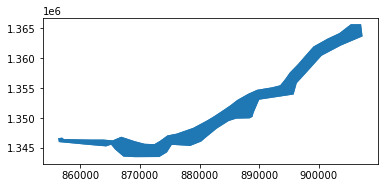

In [69]:
sa_gdf[sa_gdf.wdID==wid].plot()

In [72]:
inter = gpd.overlay(sa_gdf[(sa_gdf.wdID==wid) & (sa_gdf.SetID==2)], 
                    mapindex22[['ORMapNum','geometry']], 
                    how='intersection')

In [73]:
inter

,code,wdID,SetID,ORMapNum,geometry
0,2,WD2022-0026,2,0301.00S05.00E0000--0000,"POLYGON Z ((878960.809 1348346.959 0.000, 8813..."
1,2,WD2022-0026,2,0301.00S05.00E3300--0000,"POLYGON Z ((874610.975 1347069.256 0.000, 8761..."
2,2,WD2022-0026,2,0301.00S06.00E0000--0000,"POLYGON Z ((896277.241 1355830.201 0.000, 8957..."
3,2,WD2022-0026,2,0302.00S04.00E0100--0000,"POLYGON Z ((860519.884 1346389.789 0.000, 8605..."
4,2,WD2022-0026,2,0302.00S04.00E01AB--0000,"POLYGON Z ((861581.151 1346368.640 0.000, 8618..."
5,2,WD2022-0026,2,0302.00S04.00E01AC--0000,"POLYGON Z ((860859.803 1345538.174 0.000, 8608..."
6,2,WD2022-0026,2,0302.00S04.00E02A0--0000,"POLYGON Z ((856955.792 1346692.447 0.000, 8572..."
7,2,WD2022-0026,2,0302.00S05.00E0300--0000,"POLYGON Z ((880263.451 1346044.141 0.000, 8788..."
8,2,WD2022-0026,2,0302.00S05.00E0400--0000,"POLYGON Z ((874347.261 1346875.901 0.000, 8749..."
9,2,WD2022-0026,2,0302.00S05.00E0500--0000,"POLYGON Z ((869039.208 1346126.378 0.000, 8707..."


In [74]:
inter.shape

(13, 5)

In [75]:
len(inter.ORMapNum.unique())

13

<AxesSubplot:>

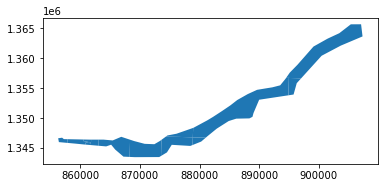

In [77]:
inter.plot()

In [78]:
out.columns

Index(['geometry', 'wetdet_delin_number', 'trsqq', 'parcel_id',
       'address_location_desc', 'city', 'county', 'site_name', 'site_desc',
       'latitude', 'longitude', 'DocumentName', 'DecisionLink',
       'is_batch_file', 'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'SetID',
       'ORMapNum', 'code', 'record_ID'],
      dtype='object')

In [79]:
inter.columns

Index(['code', 'wdID', 'SetID', 'ORMapNum', 'geometry'], dtype='object')

In [82]:
out.shape

(19, 24)

In [80]:
selectedvars = ['ORMapNum', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
    'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date','reissuance_response_date', 
                'project_id', 'site_id', 'record_ID']

In [81]:
WD2022_0026 = inter.merge(dt[selectedvars], on='ORMapNum', how='left')

In [83]:
WD2022_0026.shape

(13, 24)

In [89]:
selectedvars2 = ['address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
                 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date','reissuance_response_date', 
                'project_id', 'site_id', 'record_ID']

In [90]:
twp_pcl_mat_dis.reset_index(drop=True, inplace=True)

In [91]:
twp_pcl_mat_dis2 = twp_pcl_mat_dis[['geometry', 'wdID', 'trsqq', 'parcel_id', 'record_ID']].merge(wd_df[selectedvars2],
                                                                               on='record_ID', how='left')

In [92]:
WD2020_0130 = twp_pcl_mat_dis2[twp_pcl_mat_dis2.wdID=='WD2020-0130']
WD2020_0271 = twp_pcl_mat_dis2[twp_pcl_mat_dis2.wdID=='WD2020-0271']

In [114]:
gdf1 = pd.concat([WD2020_0130, WD2020_0271], ignore_index=True)

In [115]:
gdf1['code'] = 0
gdf1['SetID'] = 1

In [117]:
gdf2 = replace_geometry(gdf=out)

<AxesSubplot:>

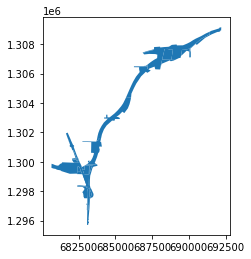

In [118]:
gdf2.plot()

In [120]:
gdf2.shape

(19, 24)

In [128]:
coldict = {'wetdet_delin_number': 'wdID', 
           'address_location_desc':'loc_desc', 
           'DocumentName':'doc_name',
           'DecisionLink':'doc_link',
           'is_batch_file':'isbatfile',
           'status_name': 'status_nm',
           'received_date':'receiveddt', 
           'response_date':'responsedt',
           'reissuance_response_date':'reissuance'}

In [129]:
gdf2 = gdf2.rename(columns=coldict)

In [130]:
WD2022_0026 = WD2022_0026.rename(columns=coldict)

In [127]:
gdf1['ORMapNum'] = gdf1[['county', 'trsqq']].apply(lambda row: create_ORMapNm(ct_nm=row.county, 
                                                                          trsqq=row.trsqq), 
                                               axis = 1)
gdf1 = gdf1.rename(columns=coldict)

In [132]:
selectedvars1 = gdf2.columns

In [160]:
gdf3=pd.concat([gdf1[selectedvars1], 
                gdf2[selectedvars1], 
                WD2022_0026[selectedvars1]], ignore_index=True)

In [134]:
gdf3.shape

(40, 24)

In [151]:
type(gdf3)

geopandas.geodataframe.GeoDataFrame

In [152]:
selectedvars1

Index(['geometry', 'wdID', 'trsqq', 'parcel_id', 'loc_desc', 'city', 'county',
       'site_name', 'site_desc', 'latitude', 'longitude', 'doc_name',
       'doc_link', 'isbatfile', 'status_nm', 'receiveddt', 'responsedt',
       'reissuance', 'project_id', 'site_id', 'SetID', 'ORMapNum', 'code',
       'record_ID'],
      dtype='object')

In [162]:
gdf3['receiveddt'].values[0]

numpy.datetime64('2020-03-05T00:00:00.000000000')

In [164]:
gdf3['receiveddt'] = gdf3['receiveddt'].dt.strftime("%Y-%m-%d")
gdf3['responsedt'] = gdf3['responsedt'].dt.strftime("%Y-%m-%d")

In [161]:
gdf3[['receiveddt', 'responsedt']].head(3)

,receiveddt,responsedt
0,2020-03-05,2020-03-31
1,2020-03-05,2020-03-31
2,2020-03-05,2020-03-31


In [167]:
from pyproj import Transformer

In [169]:
transformer = Transformer.from_crs("EPSG:2992", "EPSG:4326")

In [171]:
transformer.transform(gdf3.centroid.x[0],gdf3.centroid.y[0])

(46.1963439495032, -123.79176617158085)

In [172]:
gdf3['lat'], gdf3['lon'] = transformer.transform(gdf3.centroid.x,
                                                 gdf3.centroid.y)

In [173]:
gdf3[['lat', 'lon']].head(3)

,lat,lon
0,46.196344,-123.791766
1,46.193759,-123.802773
2,46.197231,-123.786910


In [174]:
gdf3.to_file(f'{outpath}\\test\\example_data.shp')

In [176]:
sa_gdf_s.to_file(f'{outpath}\\test\\example_SA_polygons.shp')